This notebook free for educational reuse under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/). Created by [Brady Krien](https://bradykrien.net/).

For questions/comments/improvements, email bkrien@gmail.com.<br />
____

# Network Analysis 1: Building Network Diagrams

**Description:** This [notebook](https://constellate.org/docs/key-terms/#jupyter-notebook) demonstrates how to build a network graph using data from the [Constellate](https://constellate.org/) platform. It includes the following processes:
- Using the `constellate` client to retrieve a dataset of publications
- Cleaning the dataset
- Creating an node list of authors and publications
- Create edge lists of authorship and co-authorship
- Visualizing the network and visualization with `networkx`

**Audience:** Researchers

**Use case:** Tutorial

**Difficulty:** Intermediate

**Completion time:** 45 minutes

**Knowledge Required:** 
- [Getting Started with Jupyter Notebooks](https://constellate.org/tutorials/getting-started-with-jupyter)
- [Python Basics Series](https://constellate.org/tutorials/python-basics-1)
- [Pandas 1](https://constellate.org/tutorials/pandas-1/)

**Knowledge Recommended:**
- [Exploring Metadata](https://constellate.org/tutorials/exploring-metadata)

**Learning Objectives:**
After this lesson, learners will be able to:

1. Explain the basic concepts behind a network graph
2. Create node and edge lists for publications in a Constellate dataset
3. Use these node and edge lists to create a network graph in `networkx`
4. Create a visualization of this network graph 

**Research Pipeline:**
1. Build a dataset of related publications
2. Create node and edge lists and build network graph
3. Analyze network and explore network metrics

___

# Required Python Libraries

* [Pandas](https://pandas.pydata.org/) for manipulating and cleaning data.
* [NetworkX](https://networkx.org/) for creating network diagrams

## Install Required Libraries

In [2]:
### Install Libraries ###

# Using !pip installs
!pip install networkx

# Using %%bash magic with apt-get and yes prompt

In [5]:
### Import Libraries ###
import pandas as pd
import networkx as nx
import constellate
from itertools import combinations
import matplotlib.pyplot as plt

# Required Data

We'll use the `constellate` client library to automatically retrieve the dataset in the csv file format. 

Use the default [dataset ID](https://docs.constellate.org/key-terms/#dataset-ID) in the next code cell to bring in a dataset of publications related to CRISPR from the year of its discovery (2012) or experiment with bringing in a dataset of your own. 

**Data Description:**
This lesson uses the metadata from a series of pulbications in the csv format from the JSTOR and Portico databases.

## Download Required Data

In [6]:
# Create dataset_id variable to identify the specific dataset that you want to pull in from constellate
# The default dataset is a set of publications on CRISPR gene editing technology from 2012
# This dataset is drawn from the JSTOR and Portico datasets within constellate

dataset_id = "b28fdacc-85d5-b6e4-217c-ebba8bb2605c"

In [7]:
# Import the metadata for this dataset
dataset_file = constellate.download(dataset_id, 'metadata')

CRISPR limited to document type(s) article from 2012 - 2012. 113 documents.
INFO:root:File /Users/bradykrien/data/b28fdacc-85d5-b6e4-217c-ebba8bb2605c-metadata.csv exists. Not re-downloading.


In [8]:
# Read the metadata, which comes in as a csv, into a pandas DataFrame
df = pd.read_csv(dataset_file)

# Introduction

Network analysis is an powerful tool for examining relationships. It can help make networks or influence visible and can be used to trace the spread of pathogens, money, or ideas. In this exercise, we'll demonstrate how to convert some of the metadata elements from a constellate dataset into the basic components of a network that can then be analyzed and visualized in a wide variety of ways to explore networks of authorship in academic (and specifically scientific) publishing. 

At its heard a network graph consists of relationships or **edges** between various entities or **nodes**. Both nodes and edges can take on a wide variety of manifestations. They may be characters and their conversations within a novel, bacterium and their interactions within an environment, or politicians and their co-sponsorship of legislation within Congress. For this exercise, we are going to look at authors and publications and trace the relationships among authors (namely co-authorship) and between authors and the publications in which they publish. 

The network graph that we develop will be a basic one, but it is possible to build far larger, more sophisticated, and more complex network graphs building from the basic tools that we'll demonstrate here—building lists of nodes and edges. 

Network analysis has been used by a wide variety of scholars in nearly every discipline from epidemiology to sociology to literary studies. There are a wide variety of both introductory and advanced resources on network analysis, but researchers interested in learning more may be well served by starting with Guido Caldarelli and Michael Catanzaro's [*Networks: A Very Short Introduction*](https://global.oup.com/academic/product/networks-a-very-short-introduction-9780199588077?cc=us&lang=en&).

# Building a Network Graph

## Take a Look at Your Data

We'll begin by taking a look at our metadata by calling the DataFrame into which we've read it. You can see that it contains a range of fields such as the publication date, title of the article, title of the journal, publisher, and more. While there are a range of possibilities for network analysis, we'll focus primarily on authors and publications and leave aside publishers and the rest for now.

In [10]:
# Call the DataFrame
df

,id,title,isPartOf,publicationYear,doi,docType,docSubType,provider,collection,datePublished,...,creator,publisher,language,pageStart,pageEnd,placeOfPublication,keyphrase,wordCount,pageCount,outputFormat
0,ark://27927/pgg48v4168j,Revenge without redundancy: Functional outcome...,Behavioral and Brain Sciences,2012,10.1017/S0140525X12000520,article,NaN,portico,NaN,2012-12-05,...,Colin Holbrook; Matthew M. Gervais; Daniel M. ...,Cambridge University Press,eng,22,23,NaN,revenge; punishment; forgiveness; retaliatory;...,66812,58,unigram; bigram; trigram
1,http://www.jstor.org/stable/41703890,"Transposable Elements, Epigenetics, and Genome...",Science,2012,NaN,article,research-article,jstor,NaN,2012-11-09,...,Nina V. Fedoroff,American Association for the Advancement of Sc...,eng,758,767,NaN,NaN,9598,10,unigram; bigram; trigram
2,ark://27927/pgg48v417q7,It takes more to forgive: The role of executiv...,Behavioral and Brain Sciences,2012,10.1017/S0140525X12000532,article,article-commentary,portico,NaN,2012-12-05,...,Reine C. van der Wal; Johan C. Karremans,Cambridge University Press,eng,25,25,NaN,revenge; punishment; forgiveness; retaliatory;...,66812,58,unigram; bigram; trigram
3,ark://27927/pgg3hjq3xj0,Marine sponges and their microbial symbionts: ...,Environmental Microbiology,2012,10.1111/j.1462-2920.2011.02460.x,article,NaN,portico,NaN,2012-02-01,...,Michael W. Taylor; Nicole S. Webster,"John Wiley & Sons, Inc.",eng,335,346,NaN,sponge; environ microbiol; marine sponge; spon...,8662,12,unigram; bigram; trigram
4,ark://27927/pgh1dwdzmqr,"Identification, structural, and biochemical ch...","Proteins: Structure, Function, and Bioinformatics",2012,10.1002/prot.24138,article,NaN,portico,NaN,2012-11-01,...,Seong‐Gyu Lee; Kyung Eun Lee; Byung‐Ha Oh; Hye...,"John Wiley & Sons, Inc.",eng,2573,2582,NaN,crispr; domain; streptococcus thermophilus; re...,5369,10,unigram; bigram; trigram
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,ark://27927/pgg48v416wg,"Forgiveness is institutionally mediated, not a...",Behavioral and Brain Sciences,2012,10.1017/S0140525X12000593,article,article-commentary,portico,NaN,2013-02-01,...,Don Ross,Cambridge University Press,eng,35,36,NaN,revenge; punishment; forgiveness; retaliatory;...,66812,58,unigram; bigram; trigram
109,ark://27927/phw1b3jz3rr,Phage–bacteria relationships and CRISPR elemen...,Environmental Microbiology,2012,10.1111/j.1462-2920.2011.02593.x,article,NaN,portico,NaN,2012-01-01,...,Edward A. Bayer; Raphael Lamed; Bryan A. White...,"John Wiley & Sons, Inc.",eng,207,227,NaN,crispr; metagenome; sequences; microbial; rume...,13634,21,unigram; bigram; trigram
110,ark://27927/pgj1wbt3gd,COEVOLUTION BETWEEN MATERNAL TRANSFER OF IMMUN...,Evolution,2012,10.1111/j.1558-5646.2012.01665.x,article,NaN,portico,NaN,2012-10-01,...,Thierry Boulinier; Romain Garnier; Sylvain Gandon,"John Wiley & Sons, Inc.",eng,3067,3078,NaN,immunity; maternal transfer; parasite; materna...,8516,12,unigram; bigram; trigram
111,http://www.jstor.org/stable/45156299,FIREBLIGHT SURVEY AND FIRST CHARACTERIZATION O...,Journal of Plant Pathology,2012,NaN,article,research-article,jstor,NaN,2012-11-01,...,S. Laala; C. Manceau; F. Valentini; M. Kerkoud...,Springer,eng,693,696,NaN,NaN,2884,4,unigram; bigram; trigram


## Create Node Lists

The first thing that you need to do in creating a network diagram is to develop our lists of **nodes**. We'll create a list of both authors and publications represented in the metadata through a series of functions that will generate lists of individual authors and publications. 

Within these functions, we'll also do some light cleaning of the data, removing leading and trailing spaces, eliminating the "Issue Editor" denotation that's included in some author names, and splitting up the lists of co-authors. 

For a more accurate analysis, additional data processing would be necessary to standardize the names of authors (and potentially journals). For instance, Dr. Jennifer Doudna, one of the co-inventors of CRISPR, appears as both "Jennifer A. Doudna" and "Jennifer A Doudna." The difference in punctuation means that, though they represent one entity, they will be treated as separate nodes. Similarly, with larger datasets, it might well be necessary to *disambiguate* between entities who share the same or similar names, particularly in instances where initials are used (e.g. "F. Zhang" could represent both Feng Zhang and Frederick Zhang). 

Researchers looking to learn more can get started with the [Exploring Metadata and Pre-Processing](https://constellate.org/tutorials/exploring-metadata) tutorial. 

In [13]:
# First, we'll write a function to create our list of authors
def list_author_nodes(df):
    df['creator'] = df['creator'].str.replace("Issue Editor: ","") #Eliminates issue editor denotation
    df.dropna(subset=['creator'], inplace=True) # elimates all of the entries for which there is no creator listed
    da = pd.DataFrame(df.creator.str.split(';').tolist(),index=df.id).stack() # splits the co-author lists into individual authors
    da = da.to_list()
    authors = []
    [authors.append(x.strip()) for x in da if x not in authors] # creates a list of unique autors and removes leading and trailing spaces
    return authors

In [15]:
# We can now generate our list of individual authors
authors = list_author_nodes(df)

In [22]:
# Next, we'll write a function to generate our list of publications
def list_publication_nodes(df):
    df.dropna(subset=['isPartOf'],inplace=True)
    dp = df['isPartOf'].tolist()
    publications = []
    [publications.append(x) for x in dp if x not in publications]
    return publications

In [25]:
# We can now generate our list of individual publications
publications = list_publication_nodes(df)

## Create Edge Lists

Now that we have all of our nodes, we can create our lists of edges or the relationships between them. We'll also create two edge lists—one for the relationship between co-authors and one for the relationship between authors and publications. 

We could easily choose different kinds of relationships to represent with edges. We could make connections to publishers, for instance, to highlight how publishing companies relate to this particular topic area. Or we could use institutional affiliation to help identify the institutional relationships that underlie these publishing networks. 

Similarly, we could add additional details to the edges such as direction (authors are sending their articles *to* publishers) denoted by an arrow or magnitude (the number of articles and author has co-authored with another or published in a journal) denoted by line weight. For this tutorial, we're just going to consider simple, one-dimensional edges, but there are a wide range of possibilities for defining and representing edges within the `NetworkX` library. 

One important point to note is that edges always connect two nodes. This makes creating a list of tuples an ideal format for creating an edge list. The tuples will consist of the two nodes that are connected by the edge in much the same way that a line segment can be defined by its two end points. There is a slight wrinkle here in that any list of more than two co-authors will invariably involves a series of edges. Co-authors Anna, Bill, Cynthia, and Delilah, for instance, each have a co-authorial relationship with each of their three co-authors. Their relationships would need to be defined by the list `[(Anna, Bill), (Anna, Cynthia), (Anna, Delilah), (Bill, Cynthia), (Bill, Delilah), (Cynthia, Delilah)]`. In other words, for any given set of co-authors, to define the co-authorial relationship, we'll need to list every possible combination of two authors to paint a complete picture of the relationship. We'll use the `combination` function within the `itertools` library to help capture these co-authorial relationships. 

In [30]:
# Create list of co-authorship edges
def list_coauthor_edges(df):
    from itertools import combinations # We'll use this to create all possible pairing of co-authors within an author list
    df.dropna(subset=['creator'], inplace=True)
    df = df[df['creator'].str.contains(r';')]
    da = pd.DataFrame(df.creator.str.split(';',expand=False))
    author_list = da.creator.values.tolist()
    edges = []
    for pub in author_list:
        co_authors = list(combinations(pub,2))
        edges.append(co_authors)
    all_edges = [edge for co_authors in edges for edge in co_authors]
    all_edges = list(tuple(b.strip() for b in a) for a in all_edges)
    return all_edges

In [31]:
# Generate a list of tuples of co-author relationships
coauthors = list_coauthor_edges(df)

In [32]:
# Create a list of authorship edges
def list_authorship_edges(df):
    df['creator'] = df['creator'].str.replace("Issue Editor: ","")
    df.dropna(subset=['creator'], inplace=True) # elimates all of the entries for which there is no creator listed
    da = pd.DataFrame(df.creator.str.split(';').tolist(),index=df.id).stack() # splits the co-author lists into individual authors
    da = da.to_frame()
    da = da.reset_index()
    da = da.rename(columns={0:'creator'})
    da.drop(columns=['level_1'], inplace=True)
    dy=df.drop(columns=['creator'])
    da = da.merge(dy, how='left', on='id')
    da = da[['creator','isPartOf']]
    authors = da.to_records(index=False)
    authorship = list(authors)
    authorship = list(tuple(b.strip() for b in a) for a in authorship)
    return authorship

In [33]:
# Generate a list of tuples of authorial relationships
authorship = list_authorship_edges(df)

## Compile into Network Graph

We'll be using the `NetworkX` library to build our network graph from our lists of nodes and edges. We'll only touch in the most cursory way on visualizations in this lesson, but there are a range of tools for building interesting and insightful visualizations of network graphs within the library and in combination with the `matplotlib` library. There are also a large number of metrics about the network, the relationships contained within it, and the importance of specific nodes within it, that can be calculated using this library. 

We'll begin by calling an empty graph and then begin to populate it with our nodes and edges. 

In [18]:
# Call an empty network graph
G = nx.Graph()

In [26]:
# Add the author and publication nodes to the graph
G.add_nodes_from(authors, node_type='authors')
G.add_nodes_from(publications, nod_type='publications')

In [34]:
# Add the co-authorship and authorship edges to the graph
G.add_edges_from(coauthors)
G.add_edges_from(authorship)

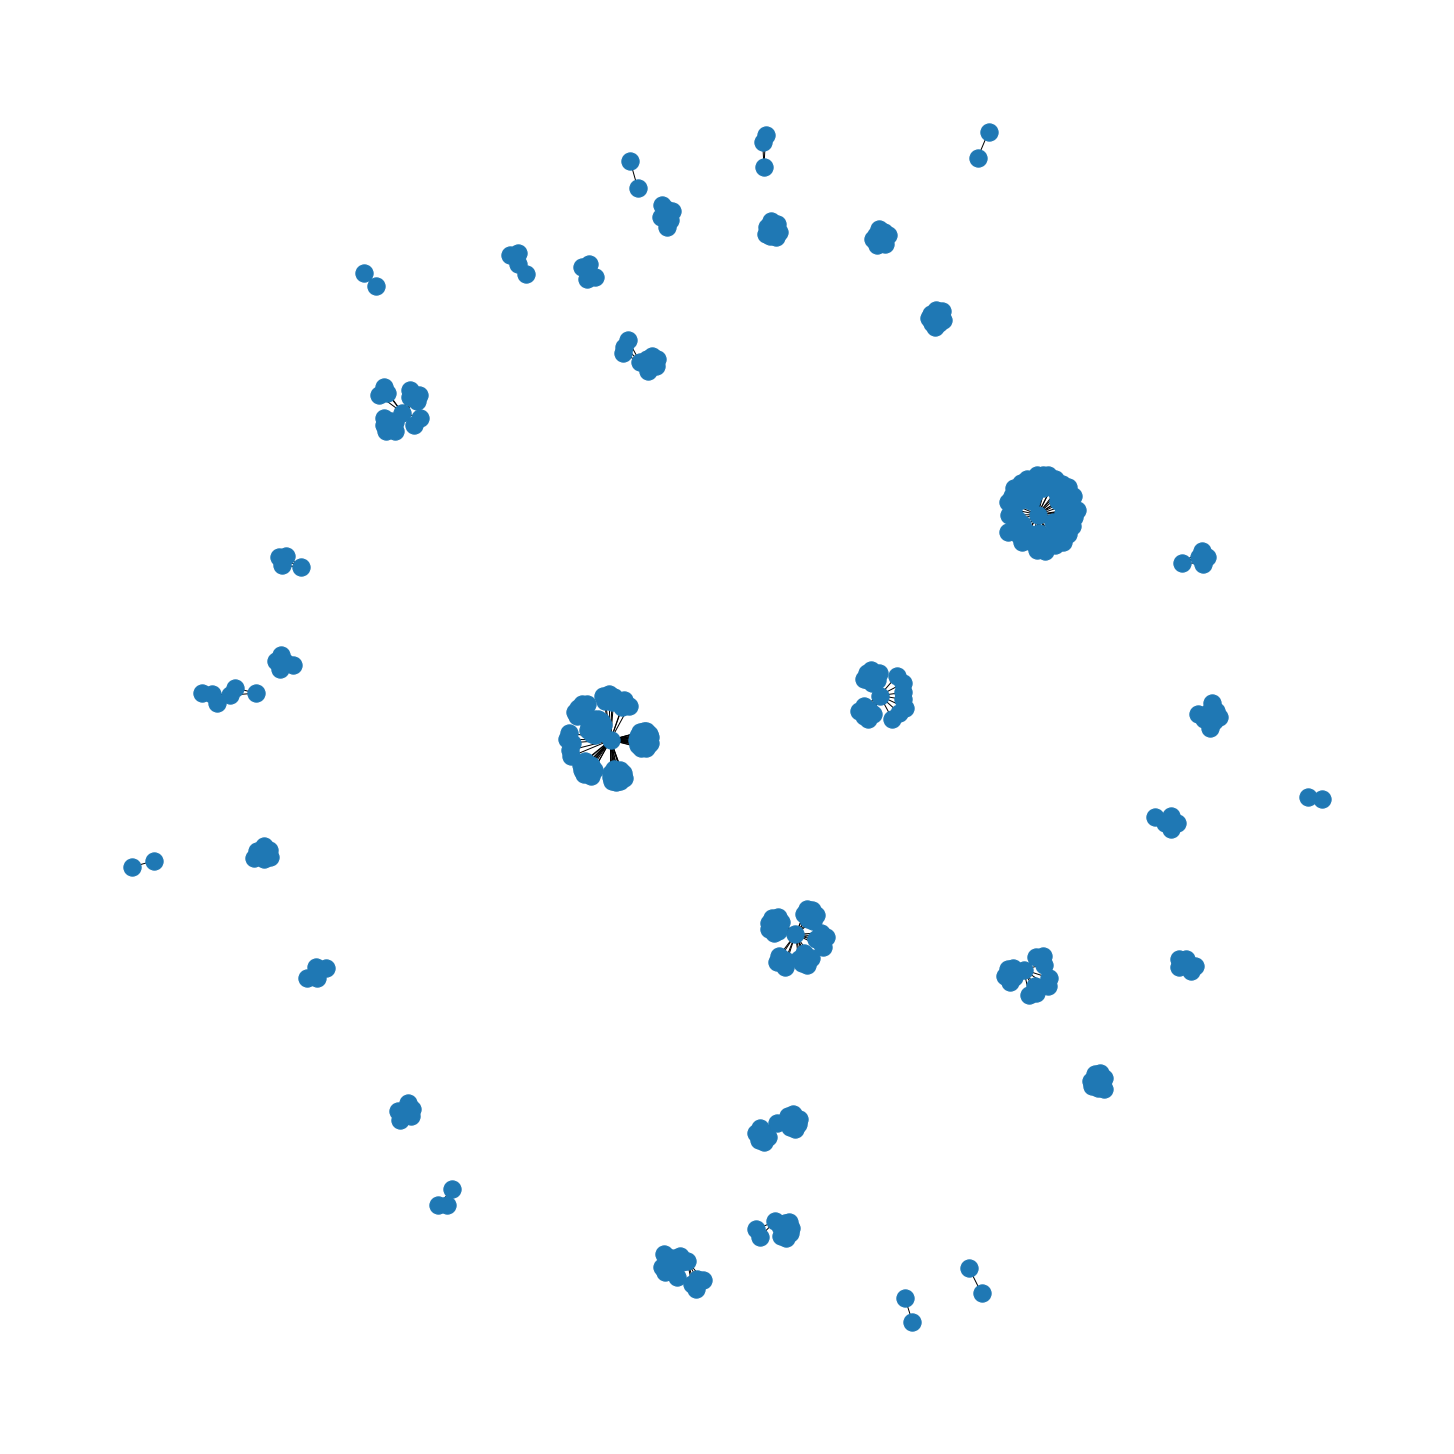

In [35]:
# Create a basic visualization using matplotlib
pos = nx.fruchterman_reingold_layout(G) # This defines the specific network visualization we'll use. 

# larger figure size
plt.figure(3,figsize=(20,20)) 
nx.draw(G,pos)
plt.show()

We can see that there are a number of relatively concentrated concentrated clusters of relationships, with relatively little interconnection between them. This is largely unsurprising for the very early stages of a research topic, in this case in the months after the initial announcement of the discovery of CRISRR. 

How do you think these networks might change if we were to look at authorial networks over the course of two years (try it with dataset #a8eecc51-44d9-00ed-9a1c-e24eb7de366f) or three years (try it with dataset #253a941e-b5a9-486f-b3ac-27a44fb63ea4)?

# Next Steps

There are a wide range of types of analyses that you can perform on network graphs. You can experiment with different types of visualizations and analytics within the NetworkX library to further refine your visualizations and deepen your analysis. Review the [NetworkX documentation](https://networkx.org/documentation/stable/reference/introduction.html) for additional visualizations and analyses that are possible with this python library. 

Not sure where to start? Check out the Network Analysis section of the [*Digital Humanities Literacy Guidebook*](https://cmu-lib.github.io/dhlg/topics/) to get started and to find additional resources

See Weingart, Scott B., Susan Grunewald, Matthew Lincoln et al. (eds.). *The Digital Humanities Literacy Guidebook.* Carnegie Mellon University, Updated April 03, 2022. https://cmu-lib.github.io/dhlg/ for additional information. 